# Task 1

# Introduction

Đây là một nghiên cứu được thực hiện bởi Paulo Cortez và Alice Silva, dữ liệu thu thập được khai thác để dự đoán kết quả học tập của học sinh trong môn toán và tiếng Bồ Đào Nha ở Bồ Đào Nha. Cortez và Silva đã sử dụng bảng câu hỏi để thu thập dữ liệu về các đặc điểm và hoàn cảnh gia đình của học sinh những thứ có ảnh hưởng đến kết quả học tập của học sinh. Các báo cáo của trường học được sử dụng để lấy điểm học kỳ và số lần vắng mặt. Bảng câu hỏi đã được xây dựng và thử nghiệm lần đầu tiên trên một nhóm nhỏ học sinh. Nghiên cứu này phân tích các đặc điểm và nền tảng gia đình của học sinh và kết quả học tập của học sinh trong môn toán sử dụng dữ liệu từ bộ dữ liệu Student Performance data set.
Mục đích tổng thể là để kiểm tra xem các yếu tố khác so với các lớp trước đó có ảnh hưởng đến kết quả học tập môn toán của học sinh trung học ở Bồ Đào Nha hay không và nếu có thì liệu một số đặc điểm trên có liên quan hay không.
Các câu hỏi nghiên cứu cụ thể là:
1. Các đặc điểm lý lịch của học sinh có liên quan không?
2. Các đặc điểm nền tảng của học sinh, khác với các lớp trước, có liên quan đến việc học sinh có nhận được điểm đỗ môn toán hay không?

In [66]:
#Libraries for data Manipulation
import numpy as np  # linear algebra
import pandas as pd  #  data  processing,  CSV  file  I/O  (e.g. pd.read_csv)
import seaborn as sns

#Libraries for Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
 
# scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
 
# linear regression 
from sklearn import linear_model 
from sklearn.preprocessing import OrdinalEncoder
from scipy.stats import skewtest # Module for testing for skewness



# libraries for plotting of residual plots
import statsmodels.api as sm  
from  statsmodels.formula.api  import  ols 

# Task 2

# The data "Student Performance Data Set" approach student achievement in secondary education of two Portuguese schools.

In [17]:
Student_mat = pd.read_csv("student-mat.csv", sep = ';') 
# standard statistical measures 
Student_mat.describe(percentiles = [.25, .5, .75, .90 ,.95, .99]) 

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
90%,18.000000,4.000000,4.000000,2.000000,3.000000,1.000000,5.000000,4.600000,5.000000,3.000000,4.000000,5.000000,14.000000,16.000000,15.000000,15.600000
95%,19.000000,4.000000,4.000000,3.000000,4.000000,2.000000,5.000000,5.000000,5.000000,3.000000,5.000000,5.000000,18.300000,16.000000,16.300000,17.000000
99%,20.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,38.120000,18.000000,18.000000,19.000000


# The features about: age, Medu, Fedu, traveltime, studytime, failures, famrel,freetime, goout, Dalc, Walc, health, absences, G1, G2, G3

In [8]:
#How many features (attributes) 
len(Student_mat.columns) 

33

In [9]:
#What data types are these
Student_mat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

Dữ liệu của chúng ta không có giá trị nào bị thiếu, có 33 cột và 395 quan sát. Các quan cũng chỉ ra rằng chúng ta có các biến chuỗi có thể cần được xử lý trước khi thực hiện bất kỳ mô hình nào. Một số mô hình không hoạt động tốt với các giá trị chuỗi.

# Provide summary statistics of the continuous numerical features

In [38]:
# quick view of columns and values 
Student_mat.head() 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


# Illustrate the features of your dataset using Histograms, Scatter Plots and Box plots

In [ ]:
plt.figure ( figsize= (12,8)) 
plt.scatter(Student_mat.G1, Student_mat.G3)
plt.title("First Class Grade vs Final Class Grade")
plt.xlabel ('First Class Grade')
plt.ylabel ('Final Class Grade')
plt.figure ( figsize= (12,8)) 
plt.scatter(Student_mat.G2,Student_mat.G3)
plt.title("Second Class Grade vs Final Class Grade")
plt.xlabel ("Second Class Grade")
plt.ylabel ('Final Class Grade')

Final grade increases with increase in first grade. The plot indicates positive linear correlation between the first class grade and the final grade. hence, the first class grade can be used to predict the final grade.
Final grade increases with increase in second grade. The plot indicates positive linear correlation between the first class grade and the final grade. hence, the second class grade can be used to predict the final grade.

In [ ]:
columns = Student_mat.columns
for value in range(33):
    plt.hist(Student_mat[columns[value]])
    plt.title('Distribution by '+ columns[value])
    plt.xlabel(columns[value])
    plt.ylabel("Frequency")
    plt.show()
    print(skewtest(a=Student_mat[columns[value]], axis=0, nan_policy='propagate')) # skewtest

From the plots, only the grades 'G1', 'G2' and 'G3' seem to be normaly distributed from their bell shape. The Z score (statistic)is a test of statistical significance that helps you decide whether or not to reject the null hypothesis. A high value indicates that you should reject the null hypotheis. The p-value is the probability that you have falsely rejected the null hypothesis. A large P value would indicate there is a high probability that you've falsely rejected the null hypothesis. 'G1', 'G2' and 'G3' have a very low P-value(<0.05) and Z-score (<2) indicating high prbability of the being normally distirbuted unlike the other variables with high Z-scores and P-values.

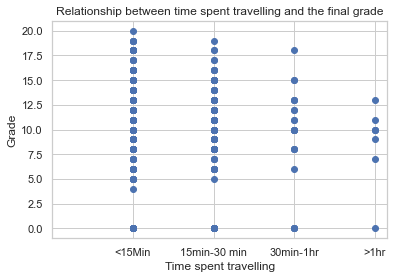

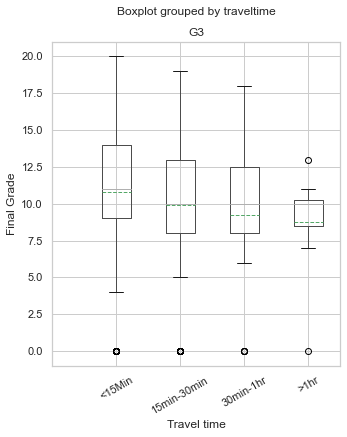

In [65]:
# Mathematics Dataset

# Relationship between time spent travelling and the final grade

# scatter plot of travelling time vs final grade
plt.scatter(Student_mat.traveltime, Student_mat.G3)
plt.title("Relationship between time spent travelling and the final grade")
plt.xticks(np.arange(5), ('', '<15Min', '15min-30 min', '30min-1hr','>1hr'))
plt.xlabel("Time spent travelling")
plt.ylabel("Grade")
plt.show()

# box plot of travelling time vs final  grade
Student_mat.boxplot('G3','traveltime',rot = 30,figsize=(5,6),meanline=True,showmeans=True)
plt.xticks(np.arange(5), ('', '<15Min', '15min-30min', '30min-1hr','>1hr'))
plt.xlabel("Travel time")
plt.ylabel('Final Grade')
plt.show()

Students with less travel time have a higher average and maximum score showing a negative correlation. They also have the lowest maximum score and the scores are also widespread from the mean. With more travel time, the average and maximum drop, and most of the scores are nearer the mean.

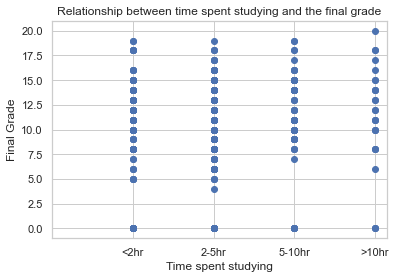

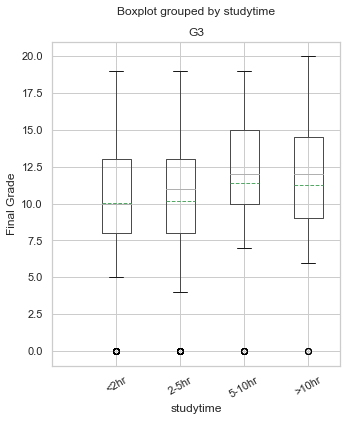

In [71]:
# Mathematics Dataset

# scatter plot of study time vs final grade
plt.scatter(Student_mat.studytime, Student_mat.G3)
plt.xticks(np.arange(5), ('', '<2hr', '2-5hr', '5-10hr','>10hr'))
plt.title("Relationship between time spent studying and the final grade")
plt.xlabel("Time spent studying")
plt.ylabel("Final Grade")
plt.show()

# box plot of study time vs final grade
Student_mat.boxplot('G3','studytime',rot = 30,figsize=(5,6),meanline=True,showmeans=True)
plt.xticks(np.arange(5), ('', '<2hr', '2-5hr', '5-10hr','>10hr'))
plt.xlabel("studytime")
plt.ylabel('Final Grade')
plt.show()

With more study time, the average increases. The maximum and minimum score increase showing a positive linear correlation.

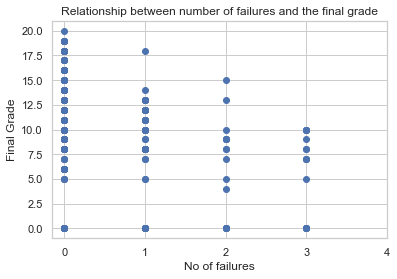

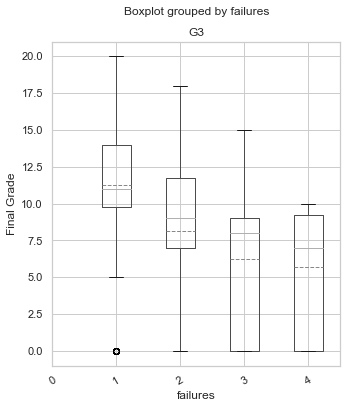

In [72]:
# Mathematics Dataset

# scatter plot of number of failures vs final grade
plt.scatter(Student_mat.failures, Student_mat.G3)
plt.title("Relationship between number of failures and the final grade")
plt.xticks(np.arange(5), ('0', '1', '2', '3','4'))
plt.xlabel("No of failures")
plt.ylabel("Final Grade") 
plt.show()

# box plot of number of failures vs final grade
Student_mat.boxplot('G3','failures',rot = 30,figsize=(5,6),meanline=True,showmeans=True)
plt.xticks(np.arange(5), ('0', '1', '2', '3','4'))
plt.xlabel("failures")
plt.ylabel('Final Grade')
plt.show()

The average, maximum and minimum scores all reduce significantly as the number of times the student fails increases. This indicates a negative linear correlation between the number of failures and the final grade.

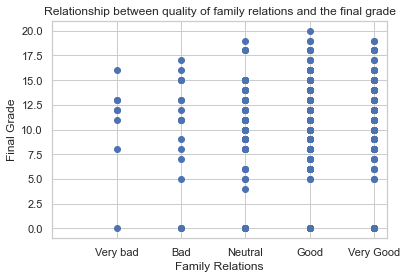

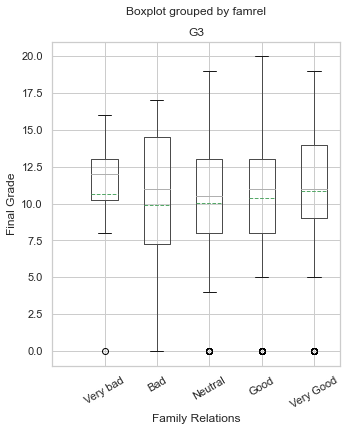

In [73]:
# Mathematics Dataset

# scatter plot of nature of family relations vs final grade
plt.scatter(Student_mat.famrel, Student_mat.G3)
plt.title("Relationship between quality of family relations and the final grade")
plt.xlabel("Family Relations")
plt.ylabel("Final Grade")
plt.xticks(np.arange(6), ('', 'Very bad', 'Bad', 'Neutral', 'Good', 'Very Good'))
plt.show()

# box plot of nature of family relations vs final grade
Student_mat.boxplot('G3','famrel',rot = 30,figsize=(5,6),meanline=True,showmeans=True)
plt.xticks(np.arange(6), ('', 'Very bad', 'Bad', 'Neutral', 'Good', 'Very Good'))
plt.xlabel("Family Relations")
plt.ylabel('Final Grade')
plt.show()

Students at the extremes of family relations, i.e. very good and ver bad, have less widespread scores with reagards to the mean. They also have higher average scores which tends to dip as we move to more neutral realtions. Those with the worst family realtions have the highest average score, but with the lowest maximum and interestingly highest minimum.

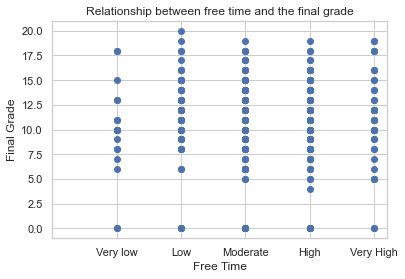

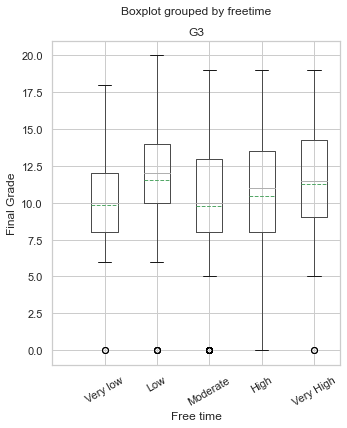

In [99]:
# Mathematics Dataset

# scatter plot of free time relations vs final grade
plt.scatter(Student_mat.freetime, Student_mat.G3)
plt.title("Relationship between free time and the final grade")
plt.xlabel("Free Time")
plt.ylabel("Final Grade")
plt.xticks(np.arange(6), ('', 'Very low', 'Low', 'Moderate', 'High', 'Very High'))
plt.show()

# box plot of free time relations vs final grade
Student_mat.boxplot('G3','freetime',rot = 30,figsize=(5,6),meanline=True,showmeans=True)
plt.xticks(np.arange(6), ('', 'Very low', 'Low', 'Moderate', 'High', 'Very High'))
plt.xlabel("Free time")
plt.ylabel('Final Grade')
plt.show()

In a very general sense, Students with more free time perform better than those with less in terms of the average and maximum grade. The interesting part is noting that those in the 'low' category depart from the trend, as they have the highest average and maximum and the least minimum score. This could be attributed to the fact that, they have more study time hence less free time, and more study time means better scores.

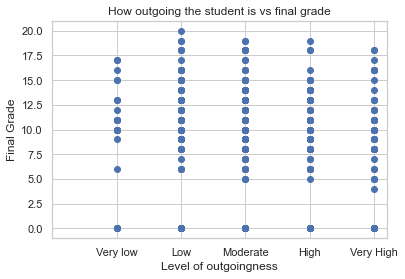

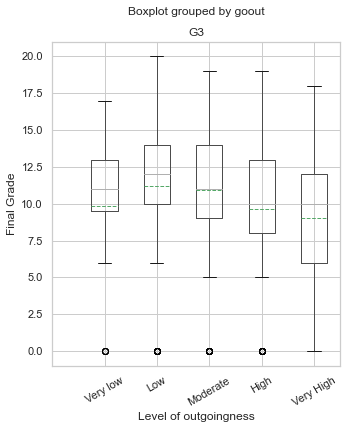

In [98]:
# Mathematics Dataset

# scatter plot of level of outgoingness vs final grade
plt.scatter(Student_mat.goout, Student_mat.G3)
plt.title("How outgoing the student is vs final grade")
plt.xlabel("Level of outgoingness")
plt.ylabel("Final Grade")
plt.xticks(np.arange(6), ('', 'Very low', 'Low', 'Moderate', 'High', 'Very High'))
plt.show()

# box plot of level of outgoingness vs final grade
Student_mat.boxplot('G3','goout',rot = 30,figsize=(5,6),meanline=True,showmeans=True)
plt.xticks(np.arange(6), ('', 'Very low', 'Low', 'Moderate', 'High', 'Very High'))
plt.xlabel("Level of outgoingness")
plt.ylabel('Final Grade')
plt.show()

The averages maxiumum and minimum scores almost make an inverted U-shape. Students who don't go out less often (the 'low' category) have the highest average and maximum, while it decreases towards the extremes. This could be attributed to the fact that, they have more study time hence less go out less, and more study time means better scores.

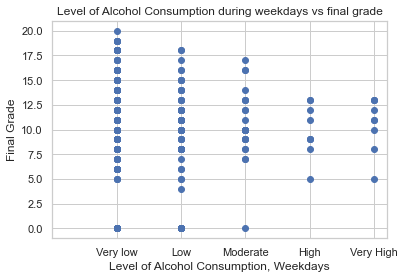

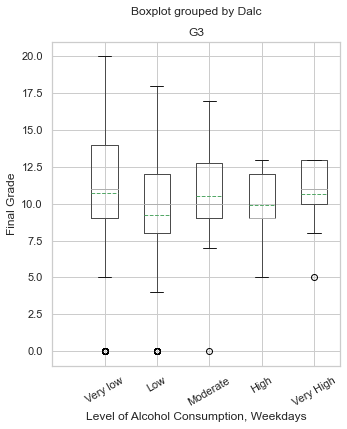

In [97]:
# Mathematics Dataset

# scatter plot of level of alcohol consumption on weekdays vs final grade
plt.scatter(Student_mat.Dalc, Student_mat.G3)
plt.title("Level of Alcohol Consumption during weekdays vs final grade")
plt.xlabel("Level of Alcohol Consumption, Weekdays")
plt.ylabel("Final Grade")
plt.xticks(np.arange(6), ('', 'Very low', 'Low', 'Moderate', 'High', 'Very High'))
plt.show()

# box plot of level of alcohol consumption on weekdays vs final grade
Student_mat.boxplot('G3','Dalc',rot = 30,figsize=(5,6),meanline=True,showmeans=True)
plt.xticks(np.arange(6), ('', 'Very low', 'Low', 'Moderate', 'High', 'Very High'))
plt.xlabel("Level of Alcohol Consumption, Weekdays")
plt.ylabel('Final Grade')
plt.show()

Students who drink more alcohol during week days get increasingly lower maximum scores. It is worth noting however the 'low' category has the lowest average. Interestingly, those with the highest consumption have the least minimum score with zero or few outliers, unlike those with lower consumtion whosescores are more widespread from the mean with more outliers.

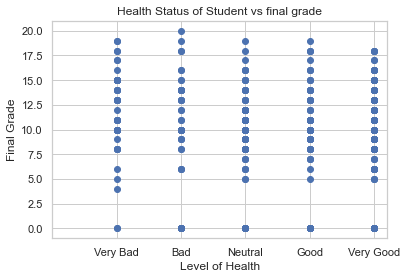

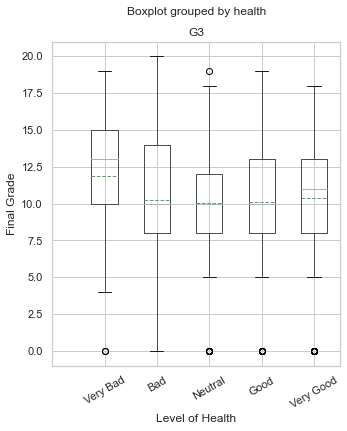

In [74]:
# Mathematics Dataset

# scatter plot of health status vs final grade
plt.scatter(Student_mat.health, Student_mat.G3)
plt.title("Health Status of Student vs final grade")
plt.xlabel("Level of Health")
plt.ylabel("Final Grade")
plt.xticks(np.arange(6), ('', 'Very Bad', 'Bad', 'Neutral', 'Good', 'Very Good'))
plt.show()

# box plot of health status vs final grade
Student_mat.boxplot('G3','health',rot = 30,figsize=(5,6),meanline=True,showmeans=True)
plt.xticks(np.arange(6), ('', 'Very Bad', 'Bad', 'Neutral', 'Good', 'Very Good'))
plt.xlabel("Level of Health")
plt.ylabel('Final Grade')
plt.show()

Student who rated their health as 'very bad' have the highest average and a relatively high maximum score regardless of outliers on the lower end. The average dips at the centre then rises again towards the 'very good' category. Generally students at the extremes have better performance.


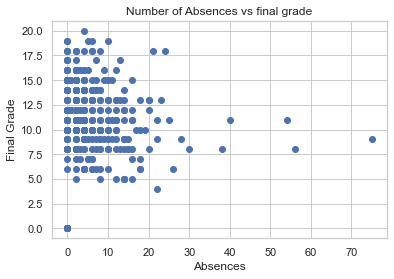

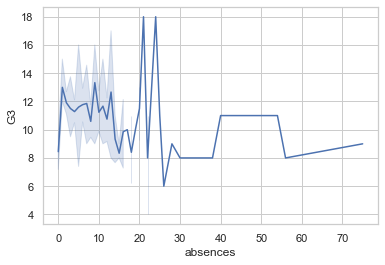

In [96]:
# Mathematics Dataset

# scatter plot of absences vs final grade
plt.scatter(Student_mat.absences, Student_mat.G3 )
plt.title("Number of Absences vs final grade")
plt.xlabel("Absences")
plt.ylabel("Final Grade")
plt.show()

# line plot of absences vs final grade
ax = sns.lineplot(x=Student_mat.absences, y=Student_mat.G3, )

Students with fewer absences perform better.

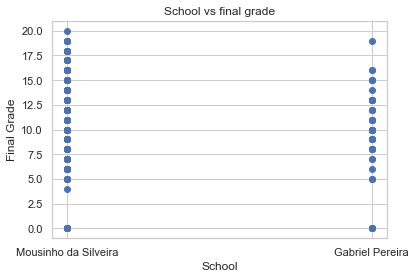

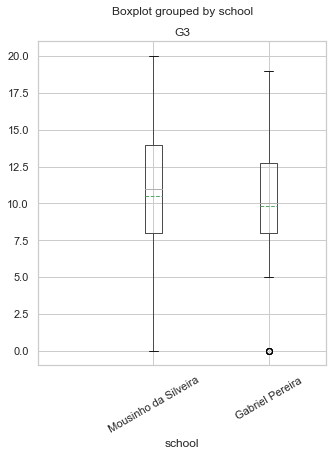

In [75]:
# Mathematics Dataset

# scatter plot of school vs final grade
plt.scatter(Student_mat.school, Student_mat.G3)
plt.title("School vs final grade")
plt.xlabel("School")
plt.ylabel("Final Grade")
plt.xticks(np.arange(2), ( 'Mousinho da Silveira', 'Gabriel Pereira'))
plt.show()

# scatter plot of school vs final grade
Student_mat.boxplot('G3','school',rot=30,figsize=(5,6),meanline=True,showmeans=True)
plt.xticks(np.arange(3), ('', 'Mousinho da Silveira', 'Gabriel Pereira'))
plt.show()

Gabriel Pereira School generally perfroms better with a higher average. However, the scores are more widespread from the mean as such it has the highest maximum score and the lowest minimum score. The converse is true for Mousinho da Silveira. It has a lower average, but the scores are less widespread from the mean. It has a lower maximum and a higher minimum.

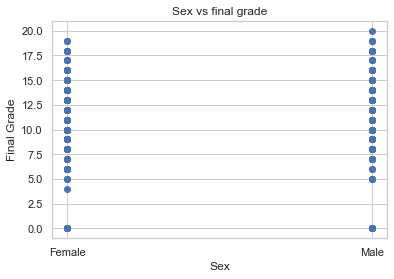

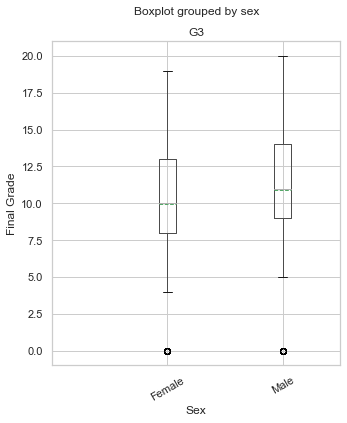

In [79]:
# Mathematics Dataset

# scatter plot of sex vs final grade
plt.scatter(Student_mat.sex, Student_mat.G3)
plt.title("Sex vs final grade")
plt.xlabel("Sex")
plt.ylabel("Final Grade")
plt.xticks(np.arange(2), ('Female', 'Male'))
plt.show()

# scatter plot of sex vs final grade
Student_mat.boxplot('G3','sex',rot = 30,figsize=(5,6),meanline=True,showmeans=True)
plt.xticks(np.arange(3), ('', 'Female', 'Male'))
plt.xlabel("Sex")
plt.ylabel('Final Grade')
plt.show()

Male students have higher scores. They have a higher maximum, average, and minimum compared to their female counterparts.

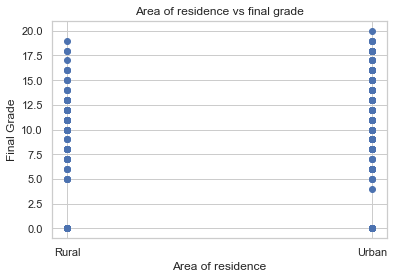

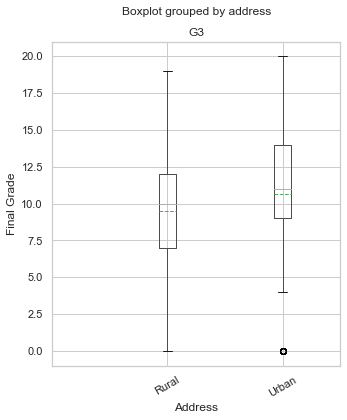

In [95]:
# Mathematics Dataset

# scatter plot of address vs final grade
plt.scatter(Student_mat.address, Student_mat.G3)
plt.title("Area of residence vs final grade")
plt.xlabel("Area of residence")
plt.ylabel("Final Grade")
plt.xticks(np.arange(2), ( 'Rural', 'Urban'))
plt.show()

# box plot of address vs final grade
Student_mat.boxplot('G3','address',rot = 30,figsize=(5,6),meanline=True,showmeans=True)
plt.xticks(np.arange(3), ('', 'Rural', 'Urban'))
plt.xlabel("Address")
plt.ylabel('Final Grade')
plt.show()

Students living in urban areas have higher scores. They have a higher maximum, average and minimum compared to those in rural areas.

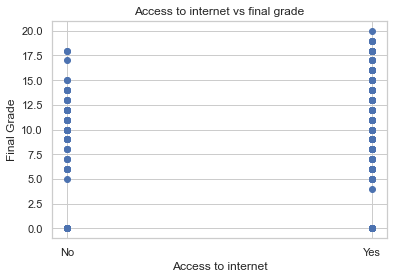

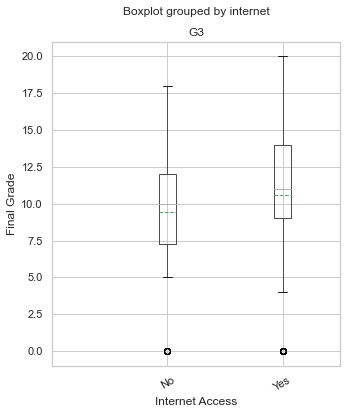

In [77]:
# Mathematics Dataset

# scatter plot of internet access vs final grade
plt.scatter(Student_mat.internet, Student_mat.G3)
plt.title("Access to internet vs final grade")
plt.xlabel("Access to internet")
plt.ylabel("Final Grade")
plt.xticks(np.arange(2), ( 'No', 'Yes'))
plt.show()

# box plot of internet access vs final grade
Student_mat.boxplot('G3','internet',rot = 30,figsize=(5,6),meanline=True,showmeans=True)
plt.xticks(np.arange(3), ('', 'No', 'Yes'))
plt.xlabel("Internet Access")
plt.ylabel('Final Grade')
plt.show()

The average score increases with acces to internet but the scores also spread further from the mean hence a higher maximum and lower minimum score.

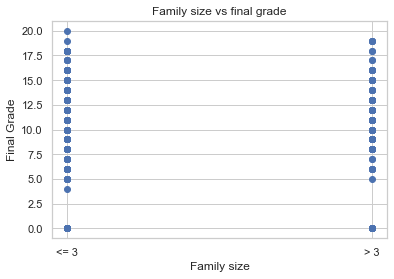

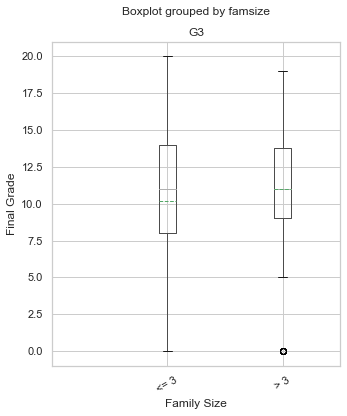

In [78]:
# Mathematics Dataset

# scatter plot of family size vs final grade
plt.scatter(Student_mat.famsize, Student_mat.G3)
plt.title("Family size vs final grade")
plt.xlabel("Family size")
plt.ylabel("Final Grade")
plt.xticks(np.arange(2), ( '<= 3', '> 3'))
plt.show()


# box plot of family size vs final grade
Student_mat.boxplot('G3','famsize',rot = 30,figsize=(5,6),meanline=True,showmeans=True)
plt.xticks(np.arange(3), ('', '<= 3', '> 3'))
plt.xlabel("Family Size")
plt.ylabel('Final Grade')
plt.show()

The average is maintained regardless of the family size. The scores get less widespread with a larger family size hence a lower maximum and higher minimum score. This could be due to the higher number of students in smaller family size.

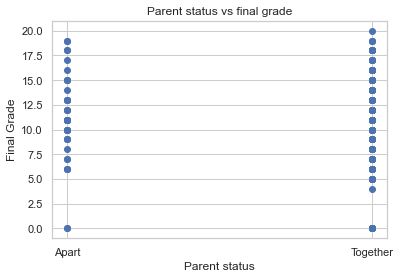

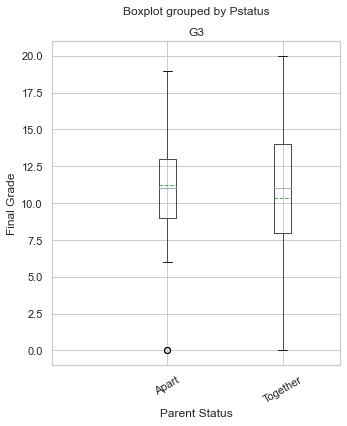

In [94]:
# Mathematics Dataset

# scatter plot of parent status vs final grade
plt.scatter(Student_mat.Pstatus, Student_mat.G3)
plt.title("Parent status vs final grade")
plt.xlabel("Parent status")
plt.ylabel("Final Grade")
plt.xticks(np.arange(2), ( 'Apart', 'Together'))
plt.show()


# box plot of parent status vs final grade
Student_mat.boxplot('G3','Pstatus',rot = 30,figsize=(5,6),meanline=True,showmeans=True)
plt.xticks(np.arange(3), ('', 'Apart', 'Together'))
plt.xlabel("Parent Status")
plt.ylabel('Final Grade')
plt.show()

The average is lower for students whose parents are together. The scores get more widespread with students whose parents live together hence a higher maximum and lower minimum score. This is also as interesting as the fact that students with 'very bad' family relations also had the highest average.

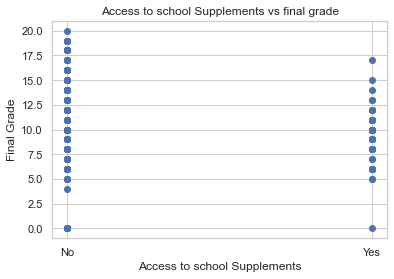

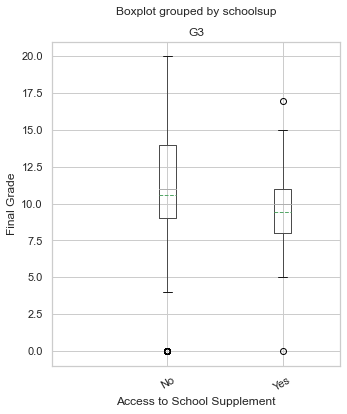

In [93]:
# Mathematics Dataset

# scatter plot of Access to School Supplements vs final grade
plt.scatter(Student_mat.schoolsup, Student_mat.G3)
plt.title("Access to school Supplements vs final grade")
plt.xlabel("Access to school Supplements")
plt.ylabel("Final Grade")
plt.xticks(np.arange(2), ( 'No', 'Yes'))
plt.show()

# box plot of Access to School Supplements vs final grade
Student_mat.boxplot('G3','schoolsup',rot = 30,figsize=(5,6),meanline=True,showmeans=True)
plt.xticks(np.arange(3), ('', 'No', 'Yes'))
plt.xlabel("Access to School Supplement")
plt.ylabel('Final Grade')
plt.show()

Fewer students receive supplements to school needs. They have a lower average, and less widespread scores.

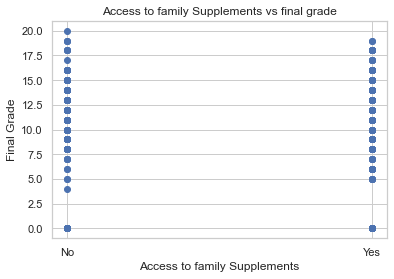

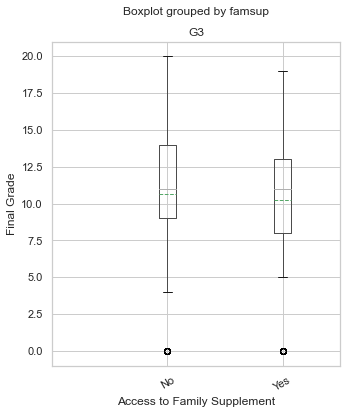

In [92]:
# Mathematics Dataset

# scatter plot of Access to family Supplements vs final grade
plt.scatter(Student_mat.famsup, Student_mat.G3)
plt.title("Access to family Supplements vs final grade")
plt.xlabel("Access to family Supplements")
plt.ylabel("Final Grade")
plt.xticks(np.arange(2), ( 'No', 'Yes'))
plt.show()

# box plot of Access to family Supplements vs final grade
Student_mat.boxplot('G3','famsup',rot = 30,figsize=(5,6),meanline=True,showmeans=True)
plt.xticks(np.arange(3), ('', 'No', 'Yes'))
plt.xlabel("Access to Family Supplement")
plt.ylabel('Final Grade')
plt.show()

Students whose families receive any sort of supplements have less widespread scores and the average is lower just like with the case of school supplements.

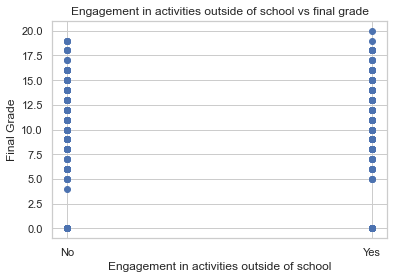

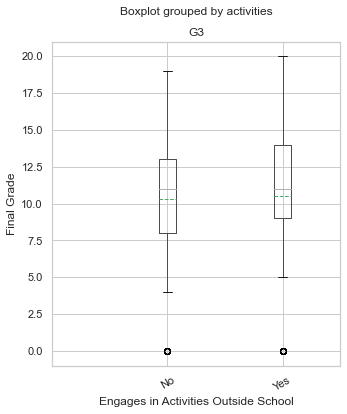

In [80]:
# Mathematics Dataset

# scatter plot of engagement in activities outside school vs final grade
plt.scatter(Student_mat.activities, Student_mat.G3)
plt.title("Engagement in activities outside of school vs final grade")
plt.xlabel("Engagement in activities outside of school")
plt.ylabel("Final Grade")
plt.xticks(np.arange(2), ( 'No', 'Yes'))
plt.show()

# box plot of engagement in activities outside school vs final grade
Student_mat.boxplot('G3','activities',rot = 30,figsize=(5,6),meanline=True,showmeans=True)
plt.xticks(np.arange(3), ('', 'No', 'Yes'))
plt.xlabel("Engages in Activities Outside School")
plt.ylabel('Final Grade')
plt.show()

The average is about the same for students who engage in activities outside of school and those who don't. However, those who do have a higher maximum and minimum showing that engaing in acticities outside of school positively impacts grades.

Text(0, 0.5, 'Final Grade')

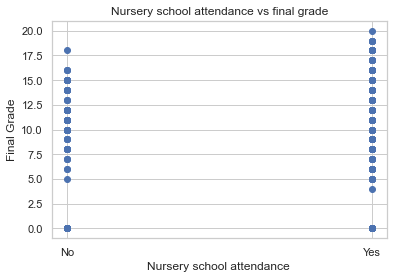

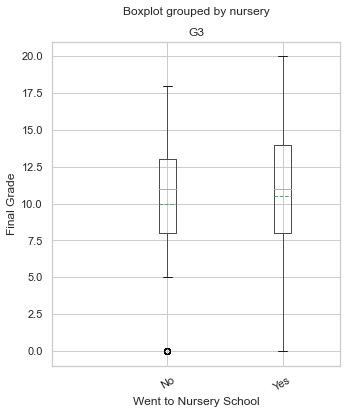

In [81]:
# Mathematics Dataset

# scatter plot of attendance of nursery school vs final grade
plt.scatter(Student_mat.nursery, Student_mat.G3)
plt.title("Nursery school attendance vs final grade")
plt.xlabel("Nursery school attendance ")
plt.ylabel("Final Grade")
plt.xticks(np.arange(2), ( 'No', 'Yes'))


# box plot of attendance of nursery school vs final grade
Student_mat.boxplot('G3','nursery',rot = 30,figsize=(5,6),meanline=True,showmeans=True)
plt.xticks(np.arange(3), ('', 'No', 'Yes'))
plt.xlabel("Went to Nursery School")
plt.ylabel('Final Grade')

The average score for students who did not attended nursery is lower indicating that nursery school maybe a fundamental part of education. For those who did, the scores are more widespread from the mean.

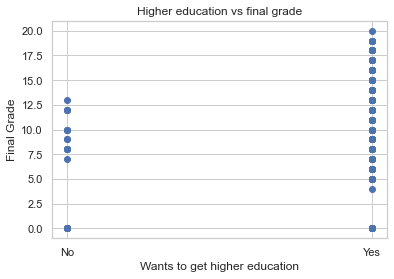

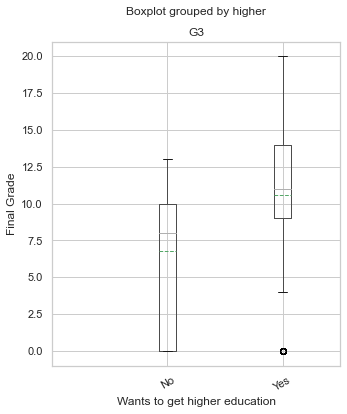

In [91]:
#  Mathematics Dataset

# scatter plot of desire to get higher education vs final grade
plt.scatter(Student_mat.higher, Student_mat.G3)
plt.title("Higher education vs final grade")
plt.xlabel("Wants to get higher education")
plt.ylabel("Final Grade")
plt.xticks(np.arange(2), ( 'No', 'Yes'))

# box plot of desire to get higher education vs final grade
Student_mat.boxplot('G3','higher',rot = 30,figsize=(5,6),meanline=True,showmeans=True)
plt.xticks(np.arange(3), ('', 'No', 'Yes'))
plt.xlabel("Wants to get higher education")
plt.ylabel('Final Grade')
plt.show()

Students who do not aspire to get higher education get a significantly lower scores across all metrics such as the mean, maximum, and minimum.

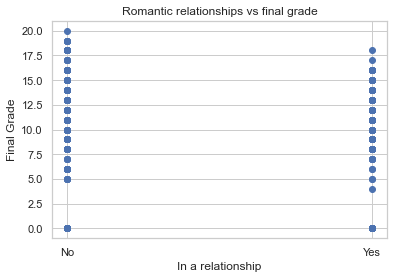

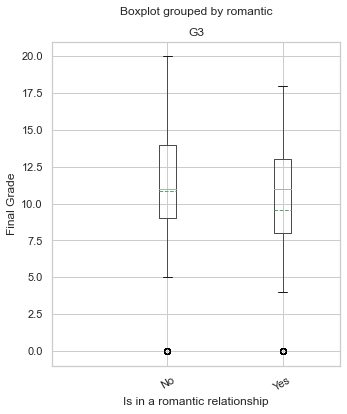

In [90]:
# Mathematics Dataset

# scatter plot of romatic relationships vs final grade
plt.scatter(Student_mat.romantic, Student_mat.G3)
plt.title("Romantic relationships vs final grade")
plt.xlabel("In a relationship")
plt.ylabel("Final Grade")
plt.xticks(np.arange(2), ( 'No', 'Yes'))

# box plot of romatic relationships vs final grade
Student_mat.boxplot('G3','romantic',rot = 30,figsize=(5,6),meanline=True,showmeans=True)
plt.xticks(np.arange(3), ('', 'No', 'Yes'))
plt.xlabel("Is in a romantic relationship")
plt.ylabel('Final Grade')
plt.show()

Students in romantic relationships get lower scores on all metrics; maximum, minimum, average.

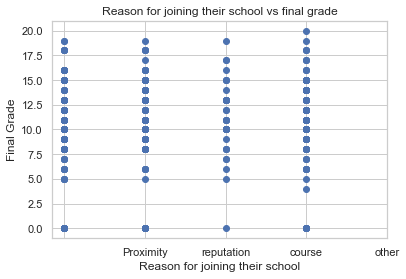

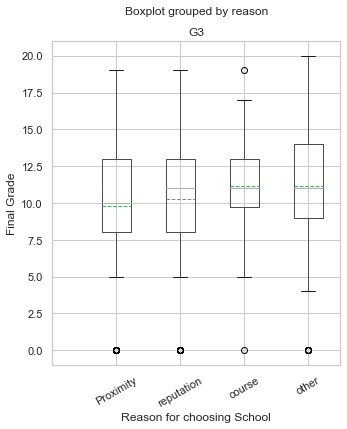

In [89]:
# Mathematics Dataset

# box plot of reason to join their school vs final grade
plt.scatter(Student_mat.reason, Student_mat.G3)
plt.title("Reason for joining their school vs final grade")
plt.xlabel("Reason for joining their school")
plt.ylabel("Final Grade")
plt.xticks(np.arange(5), ('', "Proximity", "reputation", "course", "other"))


# box plot of reason to join their school vs final grade
Student_mat.boxplot('G3','reason',rot = 30,figsize=(5,6),meanline=True,showmeans=True)
plt.xticks(np.arange(5), ('', "Proximity", "reputation", "course", "other"))
plt.xlabel("Reason for choosing School")
plt.ylabel('Final Grade')
plt.show()

Students who chose their school out of convinience of proximity have a lower average than the others, followed by reputation of the school then the course they wished to pursue.

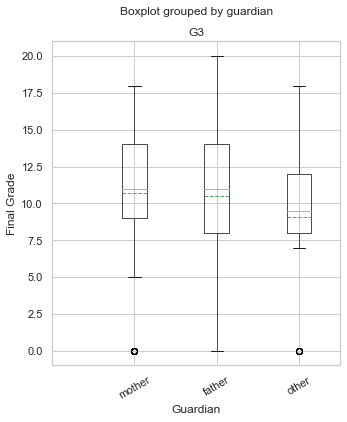

In [86]:
# Mathematics Dataset

# scatter plot of student's guradian vs final grade
Student_mat.boxplot('G3','guardian',rot = 30,figsize=(5,6),meanline=True,showmeans=True)
plt.xticks(np.arange(4), ('', "mother", "father", "other"))
plt.xlabel("Guardian")
plt.ylabel('Final Grade')
plt.show()

Students raised by their parents have a better average score than those raised by other guardians.

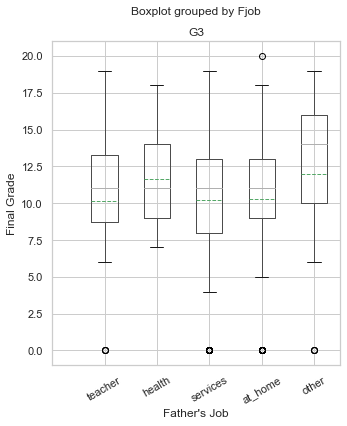

In [83]:
# Mathematics Dataset

# box plot of father's job vs final grade
Student_mat.boxplot('G3','Fjob',rot = 30,figsize=(5,6),meanline=True,showmeans=True)
plt.xticks(np.arange(6), ('', "teacher", "health", "services", "at_home", "other"))
plt.xlabel("Father's Job")
plt.ylabel('Final Grade')
plt.show()

While considering fathers' jobs, those in teaching professions have students with the lowest average. Students with Fathers in health professions have the highest average and highest minimum.

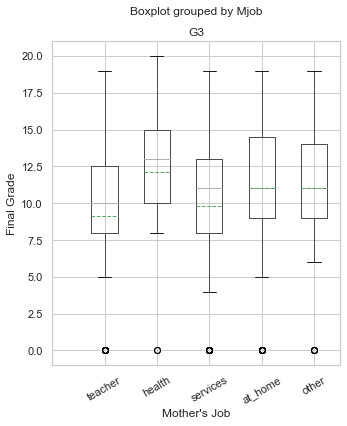

In [88]:
# Mathematics Dataset

# box plot of mother's job vs final grade
Student_mat.boxplot('G3', 'Mjob',rot = 30,figsize=(5,6),meanline=True,showmeans=True)
plt.xticks(np.arange(6), ('', "teacher", "health", "services", "at_home", "other"))
plt.xlabel("Mother's Job")
plt.ylabel('Final Grade')
plt.show()

Students whose mothers are in health perform the best in terms of the maximum, average and minimum score. Those whose mothers are teachers have relatively the lowest performance.

# Test

# a, Q-Q plts

This method is not preferred if the sample size is small. Ours is relatively large at 395 observations. If the sample size is sufficiently large most statistical significance tests may detect even trivial departures from the null hypothesis (i.e., although there may be some statistically significant effect, it may be too small to be of any practical significance); thus, additional investigation of the effect size is typically advisable, like a Q–Q plot. So, if we have a sufficiently large sample, we can opt this method instead of statistical significance tests.

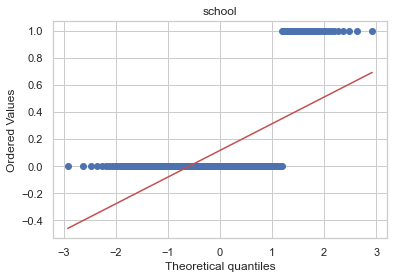

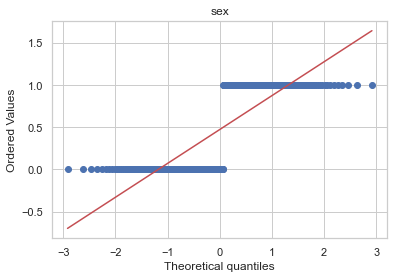

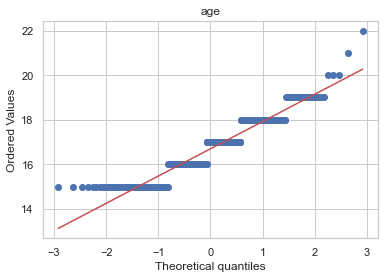

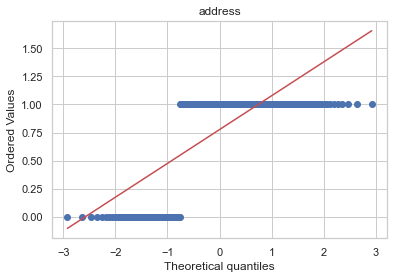

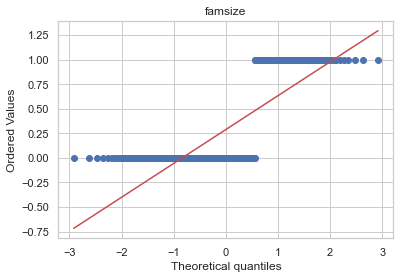

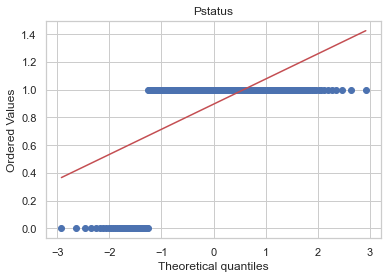

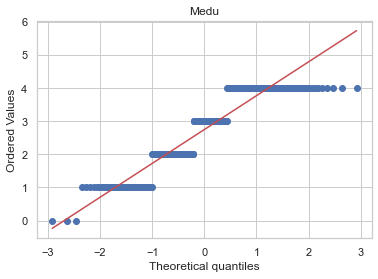

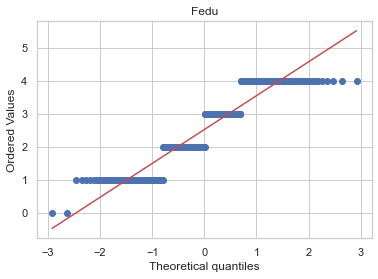

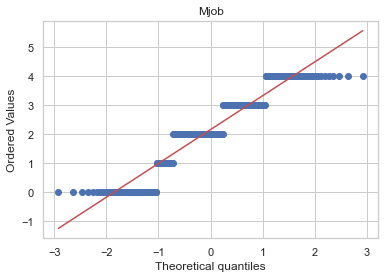

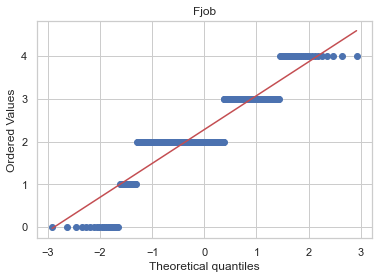

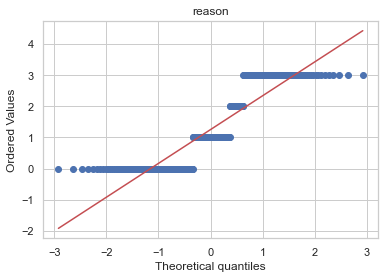

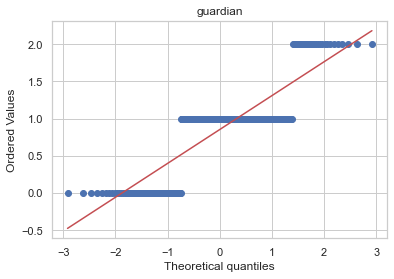

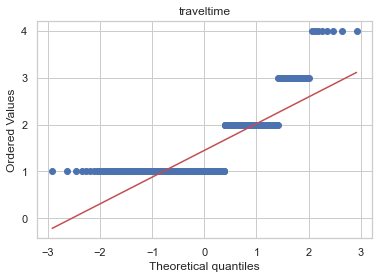

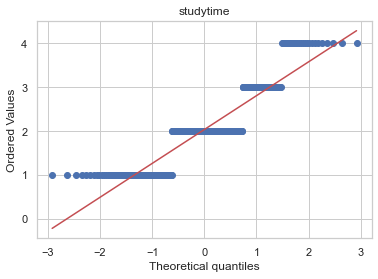

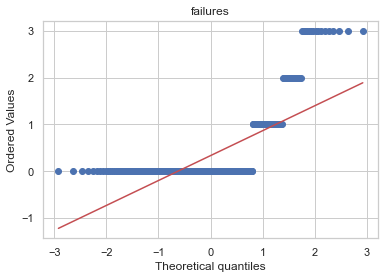

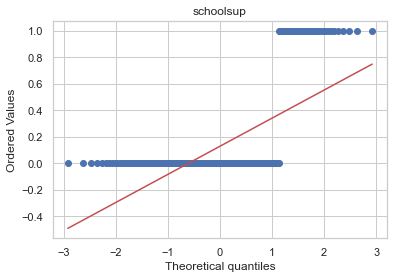

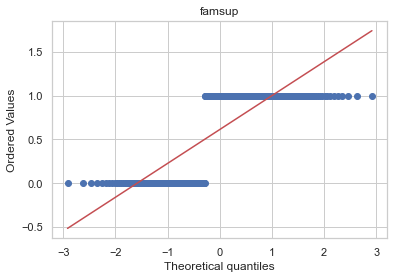

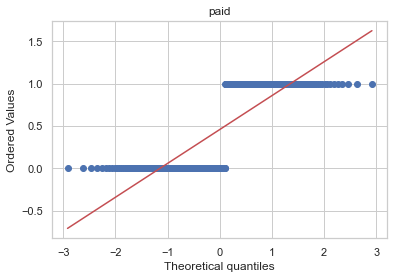

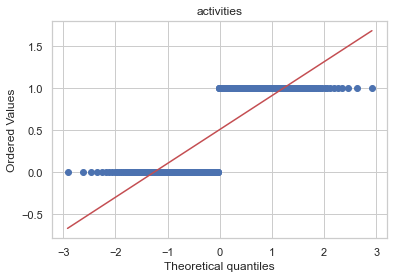

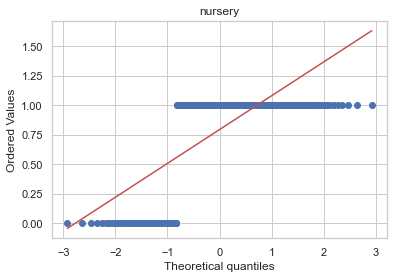

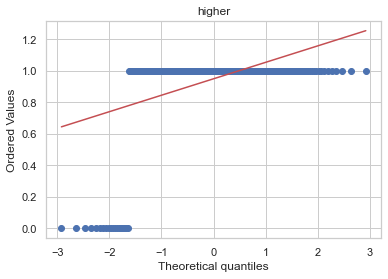

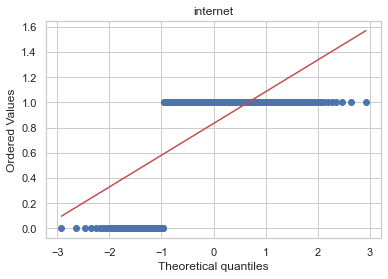

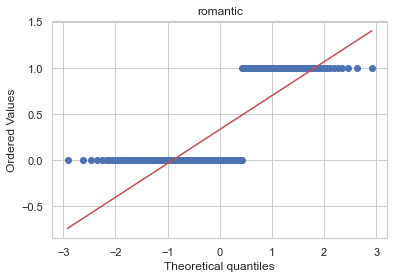

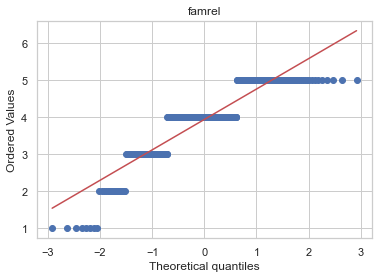

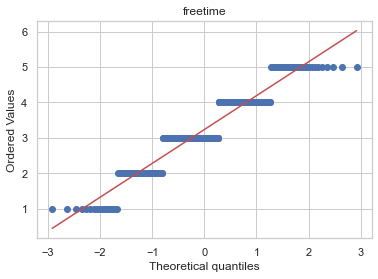

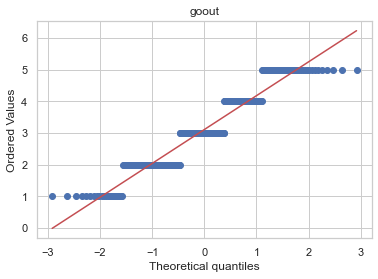

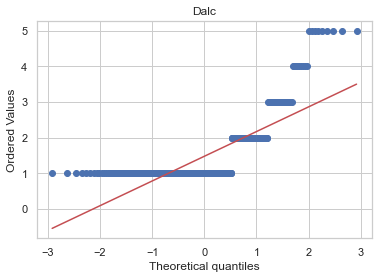

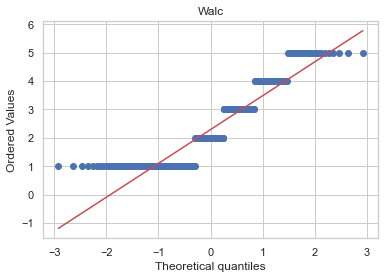

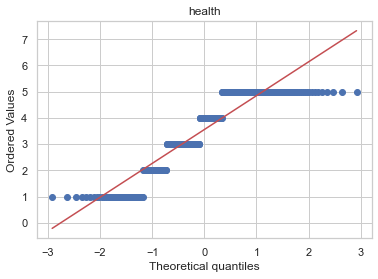

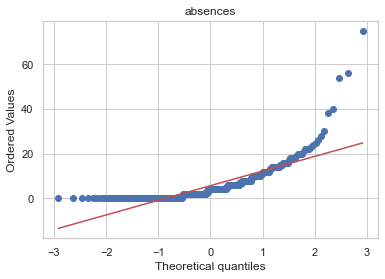

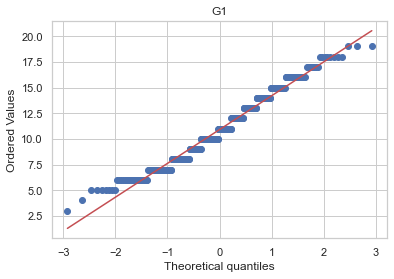

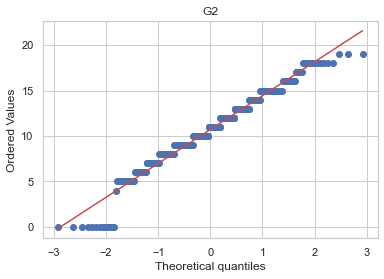

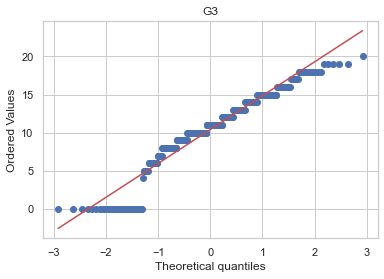

In [100]:
# Mathematics Dataset

# Q-Q plots
import scipy.stats as stats

for value in range(33):
    stats.probplot(Student_mat.iloc[:, value], dist="norm", plot=plt)
    plt.title(columns[value])
    plt.show()

All variables other than grades, exhibit a significant departure from the null hypothesis showing that they are not normally distributed.

# b, Kolmogorov–Smirnov Test 

The K-S test is a non-parametric test based on the empirical distribution function (ECDF).The Kolmogorov–Smirnov statistic measures the supremum (greatest) distance between the empirical distribution function of the sample and the cumulative distribution function of the reference distribution(standard normal distribution in our case for testing normality). If the sample comes from the referenced distribution F(x), then the test statistic converges to 0 almost.

The null distribution of this statistic calculated under the null hypothesis that the sample is drawn from the reference distribution converges to the Kolmogorov distribution.

The goodness-of-fit test or the Kolmogorov–Smirnov test can be constructed by using the critical values of the Kolmogorov distribution. This test is asymptotically valid when n tends to infinity.

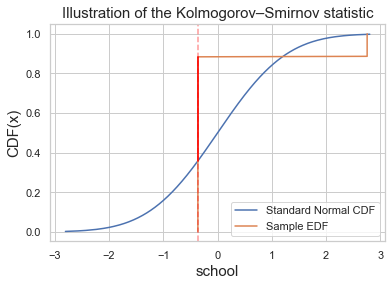

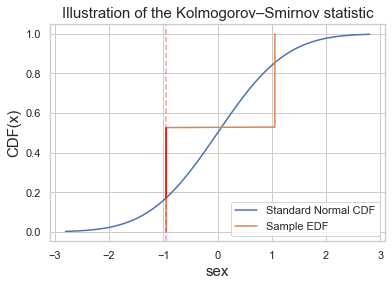

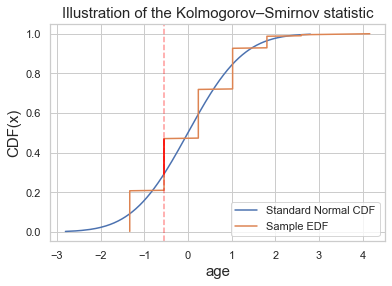

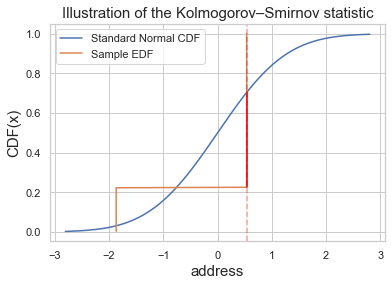

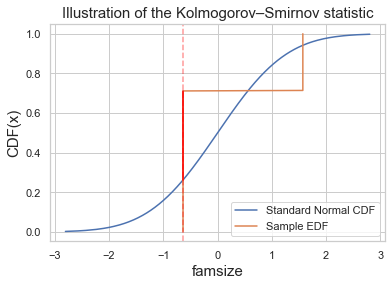

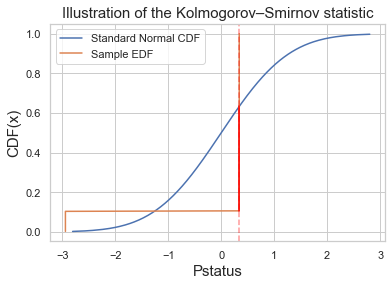

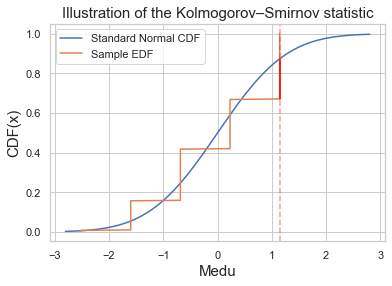

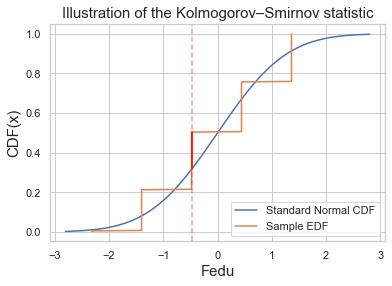

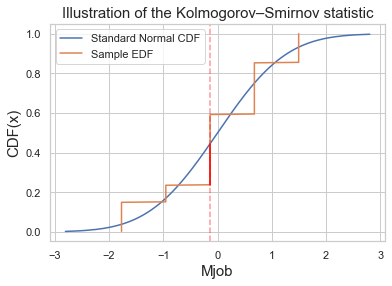

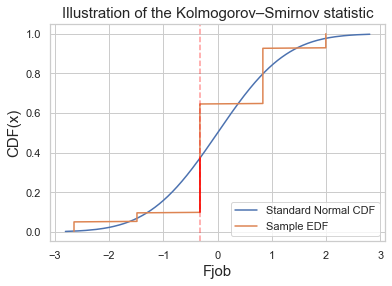

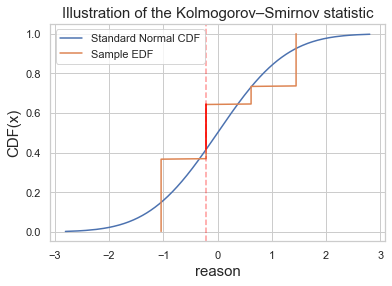

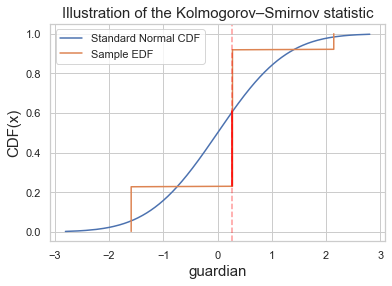

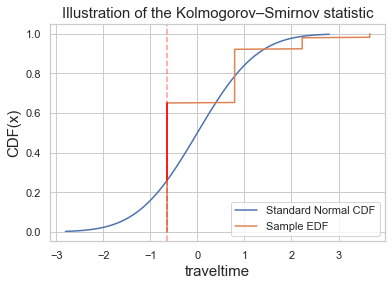

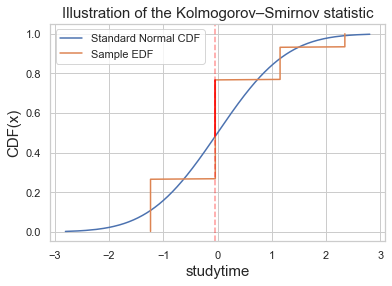

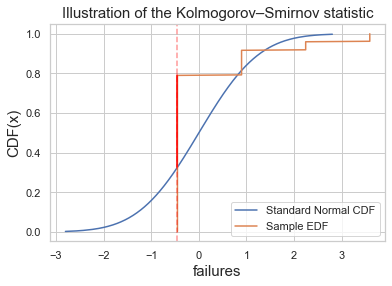

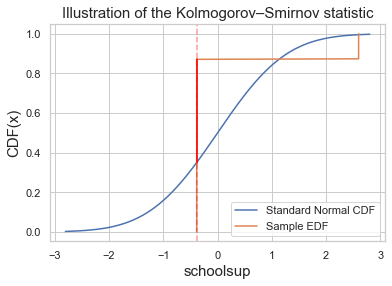

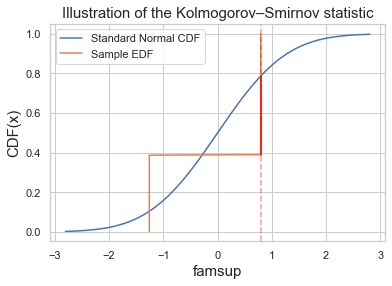

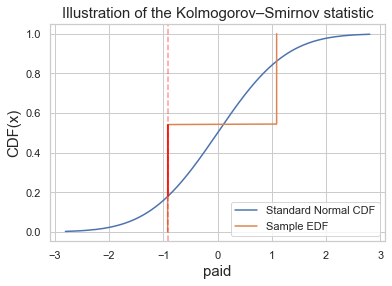

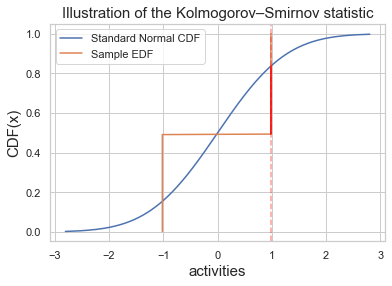

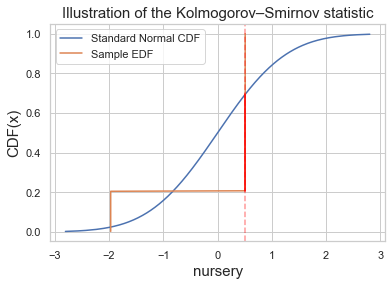

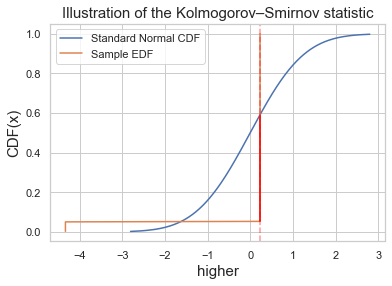

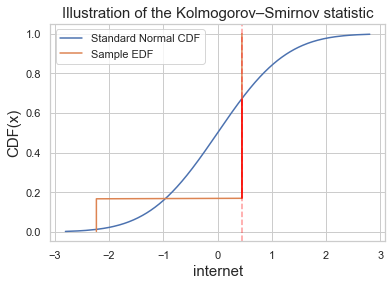

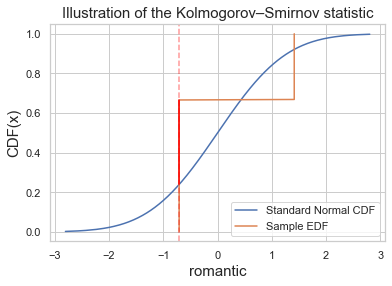

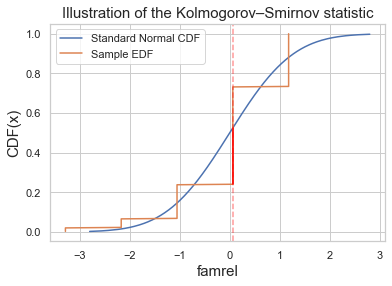

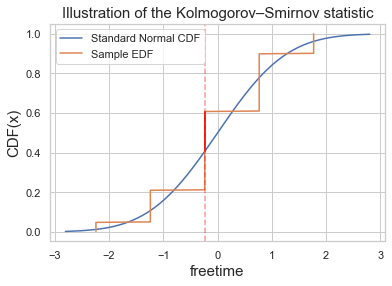

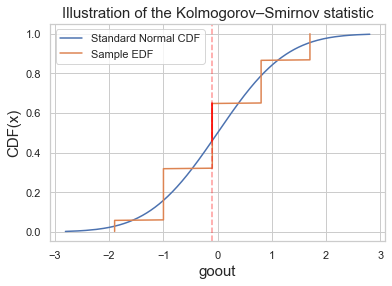

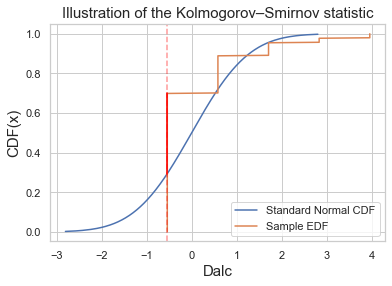

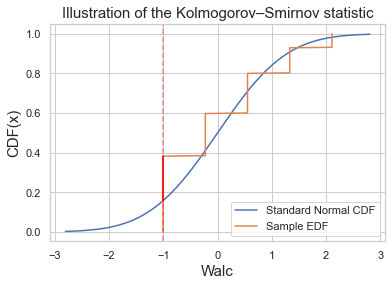

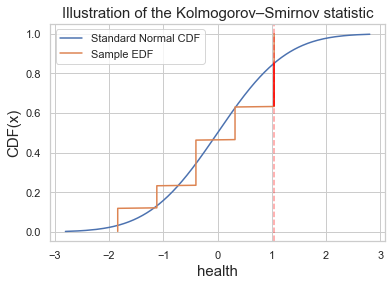

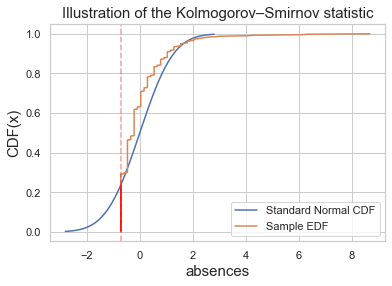

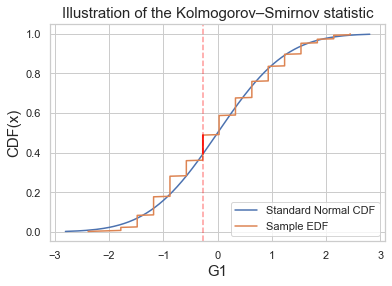

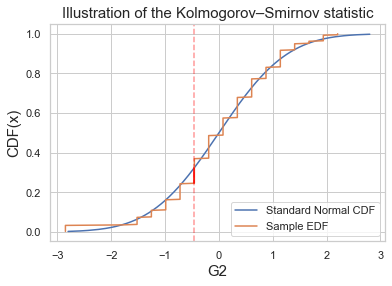

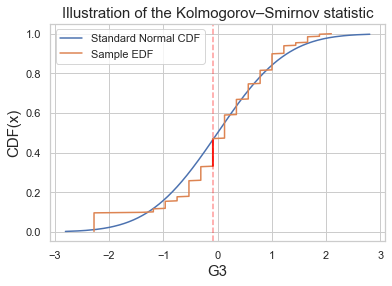

In [102]:
# Mathematics Dataset

# Kolmogorov–Smirnov Test
n=395
for value in range(33):
    standardized_data=(Student_mat.iloc[:, value]-np.mean
                       (Student_mat.iloc[:, value]))/np.std(Student_mat.iloc[:, value])
    
    ks_statistic,ks_p_value=stats.kstest(standardized_data, 'norm') #Compared with standard normal distribution
    ks_statistic,ks_p_value
    probs=np.arange(1, n+1)/n # n - sample size
    stzd_data=np.sort(standardized_data)
    theoretical_values=stats.norm.ppf(probs)
    est_probs=np.interp(stzd_data,theoretical_values,probs)
    max_id=np.argmax((probs-est_probs)**2)
    
    # plot
    plt.plot(theoretical_values,probs,label='Standard Normal CDF')
    plt.plot(stzd_data,probs,label='Sample EDF')
    plt.axvline(stzd_data[max_id], color="red", linestyle="dashed", alpha=0.4)
    plt.plot([stzd_data[max_id], stzd_data[max_id]], [probs[max_id], est_probs[max_id]], color="red")
    plt.xlabel(columns[value],size=15)
    plt.ylabel('CDF(x)',size=15)
    plt.title('Illustration of the Kolmogorov–Smirnov statistic',size=15)
    plt.legend()
    plt.show()

Again, only the grade columns exhibit normal distribution because they almost fit the actual curve.

# Task 3

# Correlation Analysis

<AxesSubplot:>

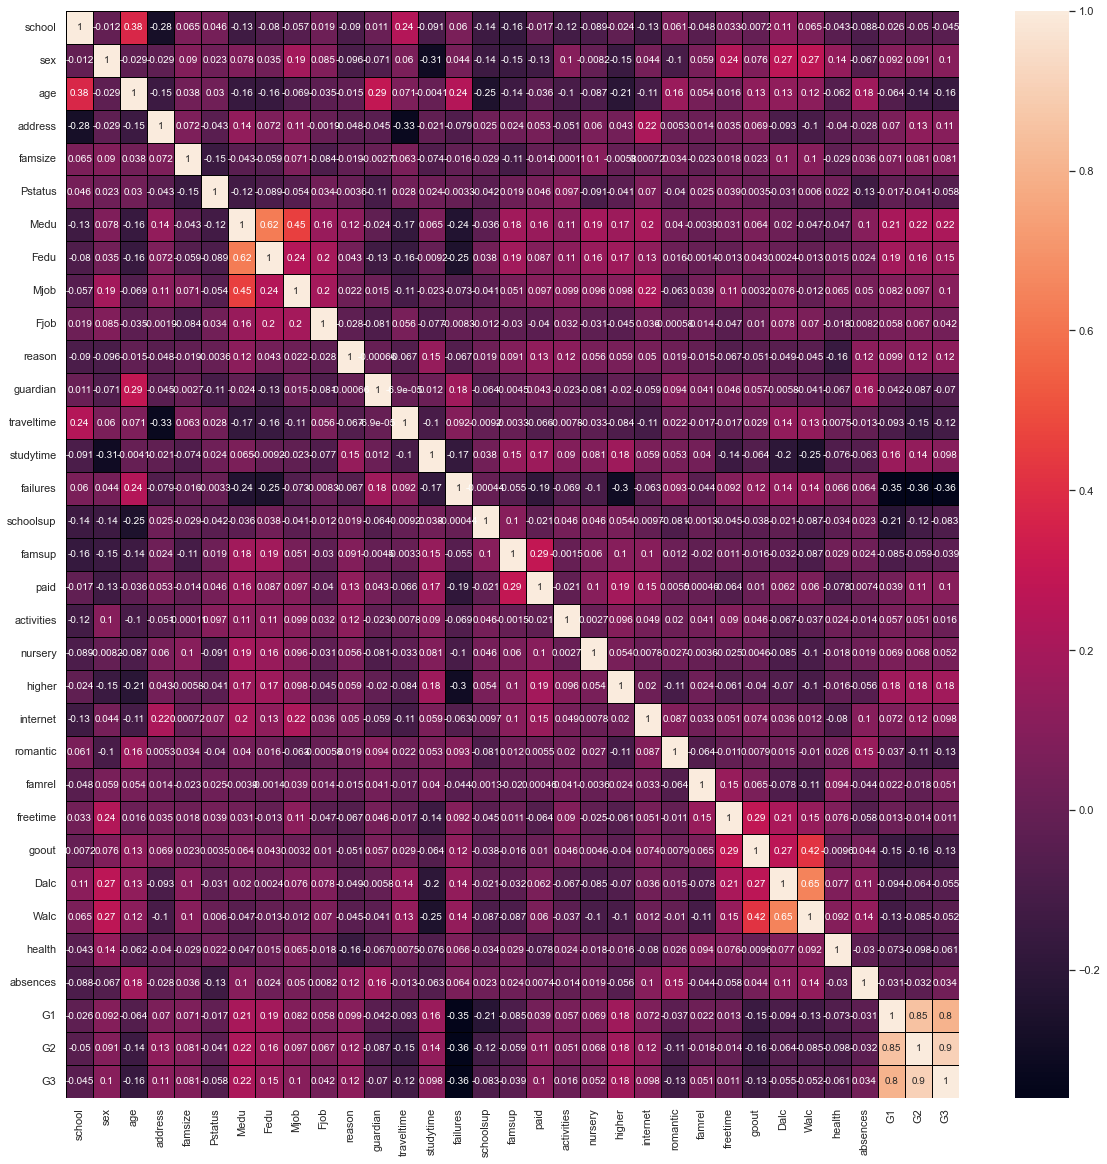

In [42]:
columns = Student_mat.select_dtypes(include=['object']).columns
ordinal_encoder = OrdinalEncoder()
Student_mat[columns] = ordinal_encoder.fit_transform(Student_mat[columns])
plt.subplots(figsize=(20,20)) 
sns.heatmap(Student_mat.corr(),annot=True,
            linewidths= 1, linecolor= 'black')

In [40]:
Student_mat.corr()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
school,1.000000,-0.012286,0.377610,-0.279797,0.064866,0.045923,-0.133333,-0.079807,-0.056670,0.018974,...,-0.047926,0.032988,-0.007152,0.114209,0.065087,-0.042651,-0.088480,-0.025731,-0.050086,-0.045017
sex,-0.012286,1.000000,-0.028606,-0.028504,0.089862,0.023443,0.078228,0.034878,0.191421,0.084957,...,0.058971,0.238744,0.075897,0.268171,0.274194,0.143588,-0.066962,0.091839,0.091099,0.103456
age,0.377610,-0.028606,1.000000,-0.146722,0.037847,0.029598,-0.163658,-0.163438,-0.069104,-0.035191,...,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579
address,-0.279797,-0.028504,-0.146722,1.000000,0.072472,-0.042572,0.138804,0.072178,0.108818,-0.001911,...,0.014258,0.034878,0.068835,-0.093494,-0.101126,-0.040355,-0.027874,0.069704,0.126037,0.105756
famsize,0.064866,0.089862,0.037847,0.072472,1.000000,-0.149612,-0.043068,-0.058879,0.071386,-0.084448,...,-0.022776,0.017695,0.023064,0.101521,0.103425,-0.028992,0.035783,0.071445,0.081223,0.081407
Pstatus,0.045923,0.023443,0.029598,-0.042572,-0.149612,1.000000,-0.123565,-0.088730,-0.054476,0.033892,...,0.025179,0.038717,0.003459,-0.030590,0.006045,0.022307,-0.134937,-0.016868,-0.041382,-0.058009
Medu,-0.133333,0.078228,-0.163658,0.138804,-0.043068,-0.123565,1.000000,0.623455,0.454805,0.157920,...,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147
Fedu,-0.079807,0.034878,-0.163438,0.072178,-0.058879,-0.088730,0.623455,1.000000,0.243327,0.200169,...,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457
Mjob,-0.056670,0.191421,-0.069104,0.108818,0.071386,-0.054476,0.454805,0.243327,1.000000,0.196758,...,0.038584,0.114321,0.003169,0.076076,-0.012051,0.065220,0.050254,0.081674,0.097390,0.102082
Fjob,0.018974,0.084957,-0.035191,-0.001911,-0.084448,0.033892,0.157920,0.200169,0.196758,1.000000,...,0.013709,-0.047475,0.010340,0.077897,0.070024,-0.018058,0.008196,0.057661,0.067006,0.042286


Most variables have very low correlation except for the three grades which is expected since the initial grades scored by a student tend to be descriptive of what they score in the future.

# Multicollinearity

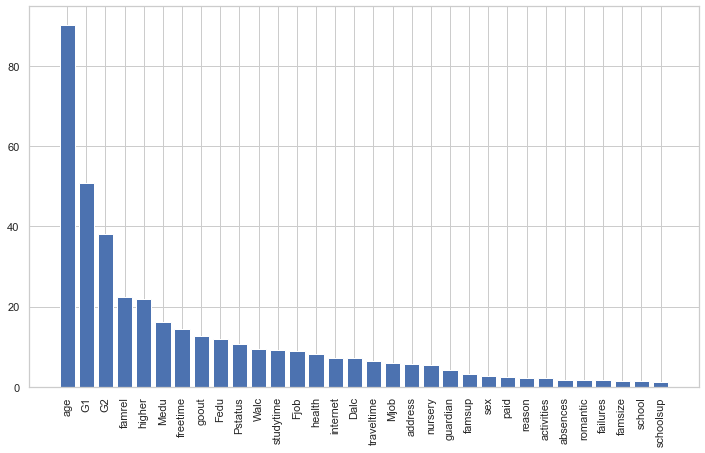

In [104]:
# Mathematics Dataset

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Defining the function that calculates VIF
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

X = Student_mat.iloc[:,:-1]
zmat=calc_vif(X)
zmat_sorted = zmat.sort_values(by=['VIF', 'variables'], ascending=False, inplace=False) #sort values

# make a bar plot for the VIf values
plt.figure(figsize=(12,7))
plt.bar(x=zmat_sorted.variables, height=zmat_sorted.VIF)
labels = zmat_sorted.variables
plt.xticks( labels, rotation='vertical')
plt.show()

Usually, categorical variables such as ID and name, which hold no significance to the target variable, are excluded while testing VIF, but since our categorical variables maybe of significance to the target variable we have included them.

Generally it seems that numerical values with a bigger range such as number of abscenses and grade have the highest multicollinearity, followed by nominal values and lastly binary values have the least multicollinearity.

In [105]:
zmat

,variables,VIF
0,school,1.552048
1,sex,2.745698
2,age,90.310080
3,address,5.806337
4,famsize,1.581935
5,Pstatus,10.658521
6,Medu,16.087866
7,Fedu,11.939712
8,Mjob,6.006968
9,Fjob,8.980194


VIF values from dataset do not show a big difference with only the grades having a significant difference.

# Task 4

In [20]:
# chọn các biến : chạy mô hình Ols để xem có phù hợp ko ( điều kiện đầu thì corr() sẽ nhỏ hơn 0,7)

#  Check biến


                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     9.352
Date:                Fri, 08 Apr 2022   Prob (F-statistic):            0.00238
Time:                        17:14:47   Log-Likelihood:                -1156.5
No. Observations:                 395   AIC:                             2317.
Df Residuals:                     393   BIC:                             2325.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.7967      0.576     15.264      0.0

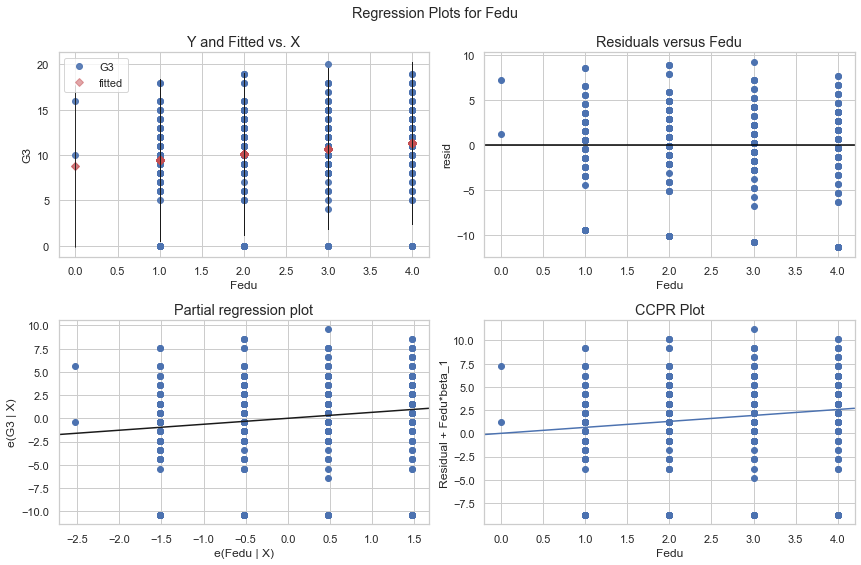

In [21]:

# test Fedu vs G3
model = ols('G3 ~ Fedu', data=Student_mat).fit() 
 
#print model summary 
print(model.summary()) 
 
#adjust figure size 
fig = plt.figure(figsize=(12,8)) 
 
#generate regression plots 
fig = sm.graphics.plot_regress_exog(model, 'Fedu', fig=fig)  

                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     7.054
Date:                Fri, 08 Apr 2022   Prob (F-statistic):            0.00823
Time:                        17:14:48   Log-Likelihood:                -1157.7
No. Observations:                 395   AIC:                             2319.
Df Residuals:                     393   BIC:                             2327.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.1141      0.679     17.833      0.0

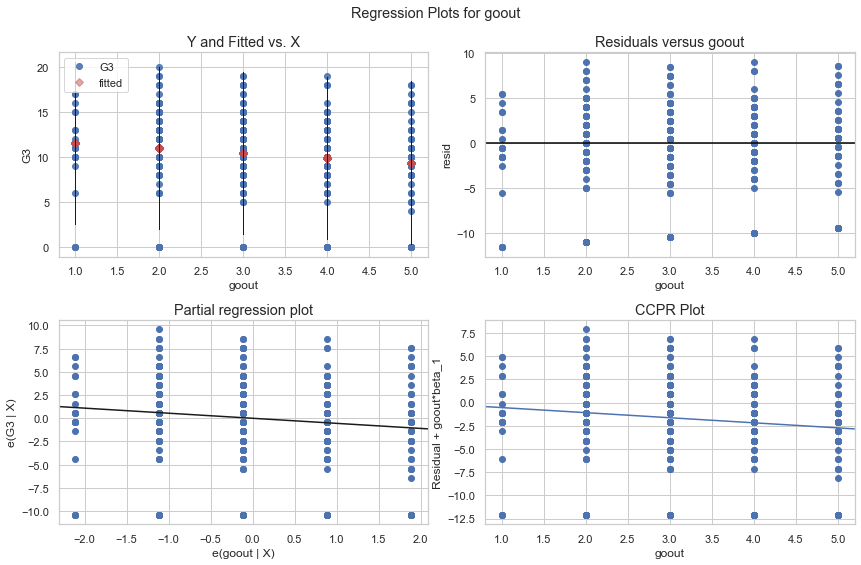

In [22]:

# test goout vs G3
model = ols('G3 ~ goout', data=Student_mat).fit() 
 
#print model summary 
print(model.summary()) 
 
#adjust figure size 
fig = plt.figure(figsize=(12,8)) 
 
#generate regression plots 
fig = sm.graphics.plot_regress_exog(model, 'goout', fig=fig)  

                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     58.67
Date:                Fri, 08 Apr 2022   Prob (F-statistic):           1.47e-13
Time:                        17:14:50   Log-Likelihood:                -1133.7
No. Observations:                 395   AIC:                             2271.
Df Residuals:                     393   BIC:                             2279.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.1572      0.236     47.259      0.0

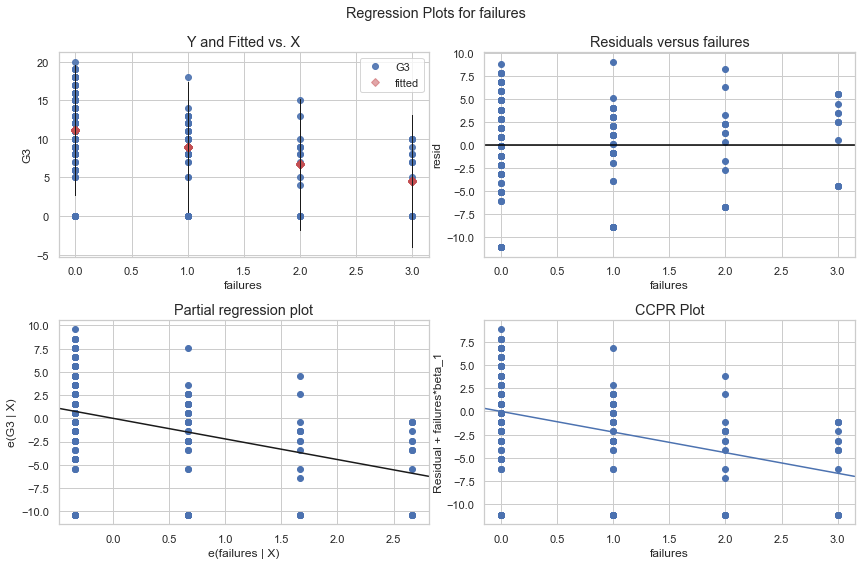

In [23]:

# test failures vs G3
model = ols('G3 ~ failures', data=Student_mat).fit() 
 
#print model summary 
print(model.summary()) 
 
#adjust figure size 
fig = plt.figure(figsize=(12,8)) 
 
#generate regression plots 
fig = sm.graphics.plot_regress_exog(model, 'failures', fig=fig)   

In [24]:
# regression results, statistical significance metrics
reg = linear_model.LinearRegression()
reg.fit( Student_mat[['Fedu' , 'Medu' , 'goout' , 'failures' ]] , Student_mat['G3'])
print( reg.score(Student_mat[['Fedu' , 'Medu' , 'goout' , 'failures' ]] , Student_mat['G3'])  ) # R_score
#print( reg.coef_ ) 
#print( reg.intercept_  ) 
# Print(f"The linear model is: \n Y = {reg.intercept_[0]} + {reg.coef_[0]}*Fedu + {reg.coef_[1]}*Medu  + {reg.coef_[2]}*failures  + {reg.coef_[3]}*G2")
print (f"The multi linear model is: \n Y = {reg.intercept_} + {reg.coef_[0]}*Fedu + {reg.coef_[1]}*Medu  +  {reg.coef_[2]}*goout + {reg.coef_[3]}*failures ")

0.15912689059852103
The multi linear model is: 
 Y = 10.748925127856744 + -0.10313061923537098*Fedu + 0.6885387736996549*Medu  +  -0.424172439470286*goout + -1.9392172826765015*failures 


In [ ]:
#coefficients tables
Model = ols('G3 ~ Medu+Fedu+goout+failures', data=Student_mat).fit()
print(Model.summary())

                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     18.45
Date:                Thu, 07 Apr 2022   Prob (F-statistic):           6.73e-14
Time:                        11:27:53   Log-Likelihood:                -1126.9
No. Observations:                 395   AIC:                             2264.
Df Residuals:                     390   BIC:                             2284.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.7489      0.847     12.685      0.0

In [ ]:
#coefficients tables
coef = pd.read_html(Model.summary2().as_html())[1]
coef[1:][[0,1]].rename ( columns = {0:"variable" , 1 : "value"})

,variable,value
1,Intercept,10.7489
2,Medu,0.6885
3,Fedu,-0.1031
4,goout,-0.4242
5,failures,-1.9392


mo hình này có  --  Fedu          -P>|t| cao hoqn 0.05 ==> k có ý nghĩa thông kế